In [1]:
import csv
from data.wikipedia import AlbumArticle
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
albums_df = pd.read_csv('albums_wikipedia.csv', index_col='id', quoting=csv.QUOTE_ALL)
print(albums_df)

                                           title  \
id                                                 
0                                          Chief   
1                              Stand By Your Man   
2                     American III: Solitary Man   
3                                    Golden Ring   
4                                The Woman In Me   
..                                           ...   
473                         Utd. State 90 (1990)   
474  (Who's Afraid Of?) The Art of Noise! (1984)   
475                      Chariots of Fire (1981)   
476       Music for the Jilted Generation (1994)   
477                                  Kala (2007)   

                             author       label  \
id                                                
0                       Eric Church     country   
1                     Tammy Wynette     country   
2                       Johnny Cash     country   
3    Tammy Wynette and George Jones     country   
4                

In [3]:
url = {}
title = []
edge_source = []
edge_target = []

In [4]:
counter = 0

def search_wikipedia(curr_url, depth=0, max_depth=2):
    if depth > max_depth or curr_url in url or (depth != 0 and curr_url in albums_df['URL']):
        return
    
    global counter
    
    hyperlinks_with_boxes = depth == 0
    album_article = AlbumArticle(curr_url, hyperlinks_with_boxes=hyperlinks_with_boxes)
    
    url[album_article.url] = counter
    counter += 1
    
    title.append(album_article.title)
    
    for hyperlink in album_article.hyperlinks:
        search_wikipedia(hyperlink, depth + 1)
        
        if depth < max_depth or hyperlink in url:
            edge_source.append(url[album_article.url])
            edge_target.append(url[hyperlink])

In [5]:
for index, row in albums_df.iterrows():
    print(index, row['URL'])
    search_wikipedia(row['URL'])

0 https://en.wikipedia.org/wiki/Chief_(album)
1 https://en.wikipedia.org/wiki/Stand_by_Your_Man_(album)
2 https://en.wikipedia.org/wiki/American_III:_Solitary_Man
3 https://en.wikipedia.org/wiki/Golden_Ring_(album)
4 https://en.wikipedia.org/wiki/The_Woman_in_Me_(Shania_Twain_album)
5 https://en.wikipedia.org/wiki/Breathe_(Faith_Hill_album)
6 https://en.wikipedia.org/wiki/Guitars,_Cadillacs,_Etc.,_Etc.
7 https://en.wikipedia.org/wiki/Unchained_(Johnny_Cash_album)
8 https://en.wikipedia.org/wiki/Some_Hearts
9 https://en.wikipedia.org/wiki/Red_Dirt_Girl
10 https://en.wikipedia.org/wiki/Seven_Year_Ache
11 https://en.wikipedia.org/wiki/Home_(Dixie_Chicks_album)
12 https://en.wikipedia.org/wiki/When_Love_Finds_You
13 https://en.wikipedia.org/wiki/Grievous_Angel
14 https://en.wikipedia.org/wiki/Little_Sparrow
15 https://en.wikipedia.org/wiki/Fearless_(Taylor_Swift_album)
16 https://en.wikipedia.org/wiki/Come_On_Over
17 https://en.wikipedia.org/wiki/Trio_(1987_album)
18 https://en.wikipedia.o

144 https://en.wikipedia.org/wiki/Quality_Control_(album)
145 https://en.wikipedia.org/wiki/How_Ya_Like_Me_Now
146 https://en.wikipedia.org/wiki/Mecca_and_the_Soul_Brother
147 https://en.wikipedia.org/wiki/Black_on_Both_Sides
148 https://en.wikipedia.org/wiki/Late_Registration
149 https://en.wikipedia.org/wiki/Paul%27s_Boutique
150 https://en.wikipedia.org/wiki/All_Eyez_on_Me
151 https://en.wikipedia.org/wiki/Enter_the_Wu-Tang_(36_Chambers)
152 https://en.wikipedia.org/wiki/Illmatic
153 https://en.wikipedia.org/wiki/Stankonia
154 https://en.wikipedia.org/wiki/To_Pimp_a_Butterfly
155 https://en.wikipedia.org/wiki/The_Low_End_Theory
156 https://en.wikipedia.org/wiki/The_Chronic
157 https://en.wikipedia.org/wiki/It%27s_a_Big_Daddy_Thing
158 https://en.wikipedia.org/wiki/3_Feet_High_and_Rising
159 https://en.wikipedia.org/wiki/Straight_Outta_Compton
160 https://en.wikipedia.org/wiki/The_Blueprint_3
161 https://en.wikipedia.org/wiki/My_Beautiful_Dark_Twisted_Fantasy
162 https://en.wikipedia

291 https://en.wikipedia.org/wiki/Hell_Awaits
292 https://en.wikipedia.org/wiki/Vol._4_(Black_Sabbath_album)
293 https://en.wikipedia.org/wiki/The_Wall
294 https://en.wikipedia.org/wiki/Hotel_California_(Eagles_album)
295 https://en.wikipedia.org/wiki/Blood_on_the_Tracks
296 https://en.wikipedia.org/wiki/Electric_Ladyland
297 https://en.wikipedia.org/wiki/OK_Computer
298 https://en.wikipedia.org/wiki/Automatic_for_the_People
299 https://en.wikipedia.org/wiki/Van_Halen_(album)
300 https://en.wikipedia.org/wiki/Moondance
301 https://en.wikipedia.org/wiki/Otis_Blue/Otis_Redding_Sings_Soul
302 https://en.wikipedia.org/wiki/Ramones_(album)
303 https://en.wikipedia.org/wiki/Sign_o%27_the_Times
304 https://en.wikipedia.org/wiki/Lady_Soul
305 https://en.wikipedia.org/wiki/Talking_Book
306 https://en.wikipedia.org/wiki/Never_Mind_the_Bollocks,_Here%27s_the_Sex_Pistols
307 https://en.wikipedia.org/wiki/Bridge_over_Troubled_Water
308 https://en.wikipedia.org/wiki/Born_in_the_U.S.A.
309 https://en

440 https://en.wikipedia.org/wiki/A_Clockwork_Orange:_Wendy_Carlos%27s_Complete_Original_Score
441 https://en.wikipedia.org/wiki/Boy_in_da_Corner
442 https://en.wikipedia.org/wiki/Vienna_(album)
443 https://en.wikipedia.org/wiki/Zuckerzeit
444 https://en.wikipedia.org/wiki/Black_Secret_Technology
445 https://en.wikipedia.org/wiki/The_In_Sound_from_Way_Out!_(Perrey_and_Kingsley_album)
446 https://en.wikipedia.org/wiki/Frequencies_(album)
447 https://en.wikipedia.org/wiki/Demon_Days
448 https://en.wikipedia.org/wiki/Paradise_(Inner_City_album)
449 https://en.wikipedia.org/wiki/Behaviour_(Pet_Shop_Boys_album)
450 https://en.wikipedia.org/wiki/20_Jazz_Funk_Greats
451 https://en.wikipedia.org/wiki/Music_Has_the_Right_to_Children
452 https://en.wikipedia.org/wiki/Actually
453 https://en.wikipedia.org/wiki/Timeless_(Goldie_album)
454 https://en.wikipedia.org/wiki/Discreet_Music
455 https://en.wikipedia.org/wiki/Dubnobasswithmyheadman
456 https://en.wikipedia.org/wiki/Madonna_(Madonna_album)
4

In [6]:
nodes = pd.DataFrame({'URL': sorted(url, key=url.get), 'title': title})
edges = pd.DataFrame({'source': edge_source, 'target': edge_target})

In [7]:
nodes.to_csv('albums_nodes.csv', index_label='id', quoting=csv.QUOTE_ALL)
edges.to_csv('albums_edges.csv', index_label='id', quoting=csv.QUOTE_ALL)

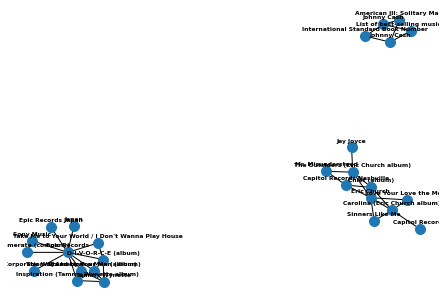

In [8]:
graph = nx.from_edgelist(zip(edge_source[:50], edge_target[:50]))
pos_nodes = nx.spring_layout(graph)
nx.draw(graph, pos=pos_nodes, node_size=100)

pos_titles = {}
for node, coords in pos_nodes.items():
    pos_titles[node] = (coords[0], coords[1] + 0.04)

node_titles = {}
for node in graph.nodes():
    node_titles[node] = nodes.iloc[node].title
    
nx.draw_networkx_labels(graph, pos_titles, labels=node_titles, font_size=6, font_weight='bold')
    
plt.show()

In [2]:
albums_df = albums_df.drop(['title', 'author'], axis=1)
nodes = nodes.drop(['title'], axis=1)

nodes = pd.merge(nodes, albums_df, how='outer', left_on='URL', right_on='URL')
nodes = nodes.drop(['URL'], axis=1)

graph = nx.from_pandas_edgelist(edges)
nx.set_node_attributes(graph, nodes.to_dict('index'))

nx.write_gexf(graph, 'albums_graph.gexf')